# Recognizing hand-written digits

Demo from: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

Here we are using a kind of machine learning model called a support vector classifier to perform classification of handwritten digits.

In [32]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

### Load in dataset

Here we're loading in a dataset consisting of labeled images of handwritten characters.

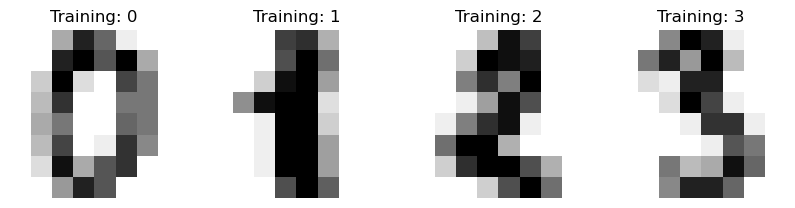

In [214]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)
    
plt.show()

### preprocess

In [215]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [217]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

### create the model

Note that this is just a python object (`clf` below). This is the case for any pre-made classifier.

In [195]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

### split dataset

In [206]:
# Split data into 70% train and 30% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.3, shuffle=False
)

In [207]:
len(X_train)

1257

In [208]:
len(X_test)

540

### fit the model

This uses uses the training images and corresponding labels to fit (or 'train') the model.

In [209]:
# Learn the digits on the train subset
clf.fit(X_train, y_train)

MLPClassifier(alpha=1, max_iter=1000)

### use trained model to predict

Now our classifier `clf` has been trained, we can use it to predict the labels of our test set.

In [210]:
# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

### See how well we did!

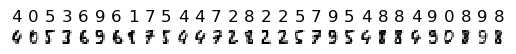

In [211]:
# Look at some actual test data and our predictions

_, axes = plt.subplots(nrows=1, ncols=30)
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"{prediction}")
plt.show()

In [212]:
# Check our accuracy (F1-score is one accuracy measure)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier MLPClassifier(alpha=1, max_iter=1000):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        53
           1       0.90      0.87      0.88        53
           2       0.98      1.00      0.99        53
           3       0.94      0.83      0.88        53
           4       0.96      0.91      0.94        57
           5       0.90      0.98      0.94        56
           6       0.93      0.98      0.95        54
           7       0.98      0.96      0.97        54
           8       0.88      0.88      0.88        52
           9       0.87      0.95      0.90        55

    accuracy                           0.93       540
   macro avg       0.93      0.93      0.93       540
weighted avg       0.93      0.93      0.93       540




Confusion matrix:
[[51  0  0  0  1  0  1  0  0  0]
 [ 0 46  0  2  0  0  0  0  0  5]
 [ 0  0 53  0  0  0  0  0  0  0]
 [ 0  0  1 44  0  2  0  1  5  0]
 [ 0  1  0  0 52  0  2  0  0  2]
 [ 0  0  0  0  0 55  1  0  0  0]
 [ 0  1  0  0  0  0 53  0  0  0]
 [ 0  1  0  0  0  0  0 52  1  0]
 [ 0  2  0  0  1  2  0  0 46  1]
 [ 0  0  0  1  0  2  0  0  0 52]]


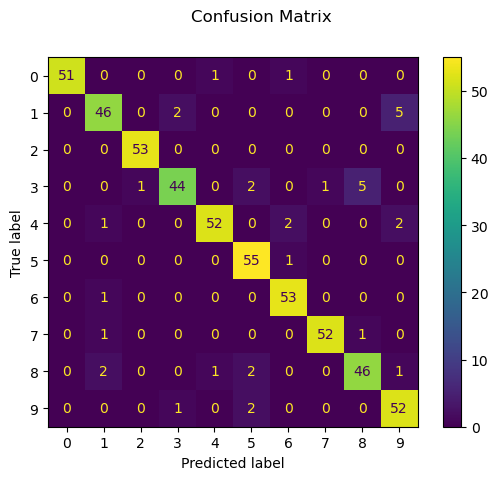

In [213]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [204]:
from sklearn.neural_network import MLPClassifier

In [205]:
# Create a classifier: a multi-layer perceptron
clf = MLPClassifier(alpha=1, max_iter=1000)